In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data.xlsx",header=0)
dff=pd.DataFrame({'event_date':df.event_date,'data_id': df.data_id,'event_type':df.event_type,'sub_event_type':df.event_type,'actor1':df.actor1,'inter1':df.inter1,'actor2':df.actor2,'inter2':df.inter2,'interaction':df.interaction,'region':df.region,'country':df.country,'admin1':df.admin1,'admin2':df.admin2,'admin3':df.admin3,'location':df.admin3,'fatalities':df.fatalities,	'Elections':df.Elections})
dff['event_date']=pd.to_datetime(dff.event_date)
dff['Until']='' #number of days from the event date until next election
dff['Since']='' #number of days to the event date since previous election
dff.head(5)

,event_date,data_id,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,region,country,admin1,admin2,admin3,location,fatalities,Elections,Until,Since
0,1997-01-01,6876151,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,NaN,5,0,,
1,1997-01-02,6876147,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Relizane,Mazouna,NaN,NaN,2,0,,
2,1997-01-03,6876144,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Saida,Youb,NaN,NaN,2,0,,
3,1997-01-04,6876142,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Blida,Blida,NaN,NaN,16,0,,
4,1997-01-05,6876139,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,NaN,18,0,,


In [3]:
#Here, I created the Until and Since variables using elections data for one country
def individual(country):
    #extract dataframe for individual countries
    UnSO = pd.DataFrame(dff[dff.country == country])
    #extract election dates
    Ele = UnSO[UnSO.Elections == 1]
    Ele = pd.DataFrame(Ele.groupby(by = ["event_date"]).size())
    Ele = list(Ele.index)
    
    data = pd.DataFrame()
    for j in range(len(Ele)):
        if j == 0: #for the events before the first election date in the dataframe there is no previous election. Thus, 'Since' is null.
            date1 = datetime.strptime(str(Ele[j]), '%Y-%m-%d %H:%M:%S')
            mask = UnSO['event_date'] <= date1
            SO = pd.DataFrame(UnSO.loc[mask])
            SO['Until'] = (SO.event_date - date1).dt.days
            SO['Since'] = '.'
            data = pd.concat([data,SO],axis = 0)
        elif j == (len(Ele)-1): #for the events after the last election date in the dataframe there is no next election. Thus, 'Unltil' is null.
            date1 = datetime.strptime(str(Ele[j-1]), '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(str(Ele[j]), '%Y-%m-%d %H:%M:%S')
            mask = (UnSO['event_date'] > date1) & (UnSO['event_date'] <= date2)
            SO=pd.DataFrame(UnSO.loc[mask])
            SO['Until']=(SO.event_date-date2).dt.days
            SO['Since']=(SO.event_date-date1).dt.days
            data=pd.concat([data,SO],axis=0)
            
            date2 = datetime.strptime(str(Ele[j]), '%Y-%m-%d %H:%M:%S')
            mask = UnSO['event_date'] > date2
            SO=pd.DataFrame(UnSO.loc[mask])
            SO['Since']=(SO.event_date-date2).dt.days
            SO['Until']='.'
            data=pd.concat([data,SO],axis=0)
        else:
            date1 = datetime.strptime(str(Ele[j - 1]), '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(str(Ele[j]), '%Y-%m-%d %H:%M:%S')
            mask = (UnSO['event_date'] > date1) & (UnSO['event_date'] <= date2)
            SO = pd.DataFrame(UnSO.loc[mask])
            SO['Until'] = (SO.event_date - date2).dt.days
            SO['Since'] = (SO.event_date - date1).dt.days
            data = pd.concat([data,SO],axis = 0)
    return(data)

In [5]:
#construct a dataframe for all countries
countries = sorted(list(set(dff.country)))
print(countries)
DataFinal = pd.DataFrame()

for country in countries:
    Temp = individual(country)
    DataFinal = pd.concat([DataFinal,Temp],axis = 0)
    
DataFinal = DataFinal.sort_values(by = ['country','event_date'])
DataFinal = DataFinal.reset_index(drop = True)
DataFinal['year']=DataFinal.event_date.dt.year
DataFinal.head(5)

['Algeria', 'Burundi', 'Kenya', 'Nigeria']


,event_date,data_id,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,region,country,admin1,admin2,admin3,location,fatalities,Elections,Until,Since,year
0,1997-01-01,6876151,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,NaN,5,0,-155,.,1997
1,1997-01-02,6876147,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Relizane,Mazouna,NaN,NaN,2,0,-154,.,1997
2,1997-01-03,6876144,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Saida,Youb,NaN,NaN,2,0,-153,.,1997
3,1997-01-04,6876142,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Blida,Blida,NaN,NaN,16,0,-152,.,1997
4,1997-01-05,6876139,Violence against civilians,Violence against civilians,GIA: Armed Islamic Group,2,Civilians (Algeria),7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,NaN,18,0,-151,.,1997


In [6]:
#Read country specific variables
var_data = pd.read_excel("var_new.xlsx",header=0)
var_data.head(10)

,country,year,kill,torture,polity,polity1,fair,corrupt,war,GDPpC,GDP,pop,tech
0,Algeria,1997,2,1,0,-3,1,0.624,1,5638.48,4.817800e+10,29742980,109070000.0
1,Algeria,1998,2,1,0,-3,5,0.624,1,6069.78,4.818800e+10,30192750,106300000.0
2,Algeria,1999,3,3,0,-3,0,0.675,1,6421.51,4.864100e+10,30623406,92680000.0
3,Algeria,2000,3,3,0,-3,5,0.697,1,6834.55,5.479000e+10,31042238,76250000.0
4,Algeria,2001,3,3,0,-3,5,0.697,1,7218.25,5.474500e+10,31451513,77270000.0
5,Algeria,2002,3,3,0,-3,1,0.697,1,7814.84,5.676000e+10,31855110,96940000.0
6,Algeria,2003,3,3,0,-3,5,0.697,0,8590.18,6.786400e+10,32264159,146190000.0
7,Algeria,2004,3,3,0,2,1,0.697,0,9182.29,8.532500e+10,32692153,189370000.0
8,Algeria,2005,3,3,0,2,5,0.697,0,9969.62,1.032000e+11,33149720,197990000.0
9,Algeria,2006,3,3,0,2,5,0.697,0,10385.78,1.170300e+11,33641007,199770000.0


In [7]:
#merge two data sets
MergedData = DataFinal.merge(var_data, on = ['country','year'])
#data transformations
MergedData['Since'] = np.where(MergedData['Since'] == '.', 1000000, MergedData['Since'])
MergedData['Until'] = np.where(MergedData['Until'] == '.', -1000000, MergedData['Until'])
MergedData['Since'] = MergedData['Since'].astype(int)
MergedData['Until'] = MergedData['Until'].astype(int)
MergedData['pre'] = np.where(abs(MergedData['Until']) <= MergedData['Since'], 1, 0)
MergedData['post'] = np.where(MergedData['pre'] == 0, 1, 0)

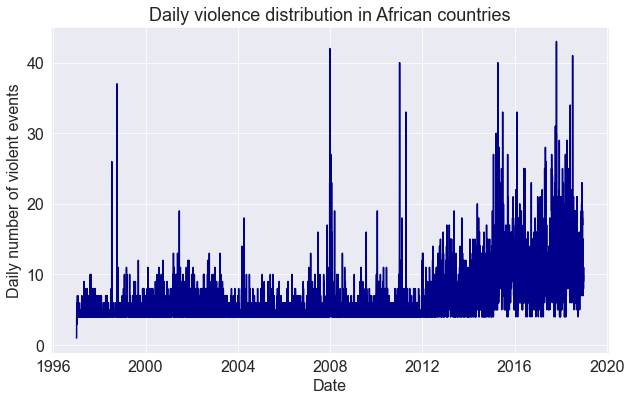

In [8]:
#plot the trend in political violence in Africa. We can see an increasing trend during the recent past.
MergedData['freq'] = 1
GroupData = MergedData.groupby('event_date')['freq'].sum().reset_index()

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='event_date', y='freq', data=GroupData, color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Daily number of violent events', fontsize=16)
plt.title('Daily violence distribution in African countries', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

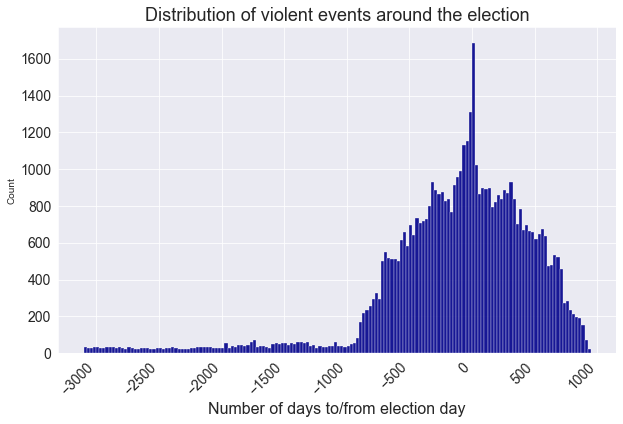

In [11]:
#increasing violence closer to election day. Negative and positive values indicate number of days to and from election day respectively.
ElectionVio = MergedData[(MergedData['pre'] == 1) | (MergedData['post'] == 1)]
ElectionVio['days'] = np.where(ElectionVio['pre'] == 1, ElectionVio['Until'], ElectionVio['Since'])

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=ElectionVio, x='days', binwidth=25, color='darkblue', alpha=0.9)
plt.title('Distribution of violent events around the election', fontsize=18)
plt.xlabel('Number of days to/from election day', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()